In [220]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# IMPORTANTE
# o codigo acima mostra os resultados em uma célula sem 
# "Scrollbars"(barra de rodagem)
# outra forma de conseguir isto pe clicar na celula que está com "Scrollbar" e
# cliar "shift"+"o"

# Índice<a id='ind'></a>

- [1. Bibliotecas](#bib)
- [2. Leitura dos dados](#leitura)
- [3. Inspeção inicial nos dados](#inspecao)
- [4. Distribuições das variáveis](#distri)
    - [4.1 Variáveis categóricas](#distr_varcat)
    - [4.2 Variáveis numéricas](#distr_varnum)

--colocar descrição do que foi fetio no trabalho ---


## 1. Bibliotecas <a id='bib'></a>
[Índice](#ind)

In [104]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

import importlib    #usar como: importlib.reload(nome_pack)
from pathlib import Path
import os

# bibliotecas pessais
import modulos.template as tmp
import modulos.anotacoes as an
import modulos.limites as li

# define o tema so seaborn
sns.set_theme(style='white')

# foam de exibição de dataframes
pd.pandas.set_option('display.max_columns', None)

In [142]:
importlib.reload(tmp)
importlib.reload(an)
importlib.reload(li)

<module 'modulos.limites' from '/home/joao/Desktop/Projetos_data_science/data_science/body_performance/modulos/limites.py'>

## 2. Leitura e informações sobre os dados<a  id="leitura"></a>
[Índice](#ind)

Fonte dos dados originais:
https://www.kaggle.com/datasets/kukuroo3/body-performance-data

- **age:** idade 
- **gender:** sexo
- **height_cm:** altura em centímetro
- **weight_kg:** peso em kiligrama
- **body fat_%:** porcentagem de gordura corporal
- **diastolic:** pressão sanguinea diastólica (min)
- **systolic:** pressão sanguinea sistólica (min)
- **gripForce:** força aplicada pela mão para puxar ou suspender objetos
- **sit and bend forward_cm:** medidas para o "sente-se e incline-se para a frente" em cm [ver referencia 1 abaixo para mais informações]
- **sit-ups counts:** numero de vezes que a pessoa consegue sentar a levantar por um intervalor de tempo
- **broad jump_cm:** distância de um salto largo em cm
 
Ref
- [1] https://medlineplus.gov/ency/imagepages/19465.htm

In [7]:
# importa os dados
current_path = os.getcwd()
path_dados=Path(current_path)/"dados"
df=pd.read_csv(path_dados/"bodyPerformance.csv", low_memory=False)
df.head(4)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B


## 3. Inspeção inicial nos dados<a id="inspecao"></a>
[Índice](#ind)

**dimensao dos dados**

In [ ]:
# dimensão do dataset
print("Número de colunas nos dados: ",df.shape[1])
print("Número de linhas nos dados: ",df.shape[0])

**Identificação do tipo de variável e contabilização dos dados ausentes**

In [44]:
#identifica dados ausentes e tipo dos dados
pd.DataFrame(zip(df.columns,                 
                 df.dtypes.values,
                 df.isnull().sum().values,),
             columns=["variável", "tipo","num. de dados ausentes"])

,variável,tipo,num. de dados ausentes
0,age,float64,0
1,gender,object,0
2,height_cm,float64,0
3,weight_kg,float64,0
4,body fat_%,float64,0
5,diastolic,float64,0
6,systolic,float64,0
7,gripForce,float64,0
8,sit and bend forward_cm,float64,0
9,sit-ups counts,float64,0


**Identificação das variáveis categóricas e numéricas**

In [47]:
# variáveis categóticas
vars_cat = [x for x in df.columns if df[x].dtype == 'O']
vars_num = [x for x in df.columns if x not in vars_cat]
print("Variáveis categóricas:\n ", vars_cat)
print("Variávies numéricas:\n ", vars_num)

Variáveis categóricas:
  ['gender', 'class']
Variávies numéricas:
  ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']


**Variáveis categóricas: cardinalidade**

In [49]:
# cardinalidade: variáveis categóricas
card=df[vars_cat].nunique()
df_card=pd.DataFrame(zip(vars_cat,card),\
                     columns=["variável", "cardinalidade"])

df_card.style.background_gradient()

,variável,cardinalidade
0,gender,2
1,class,4


**Variáveis numéricas: estatísticas**

In [54]:
df[vars_num].describe().style.background_gradient()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


## 4. Distribuições das variáveis<a id="distri"></a>
[Índice](#ind)


### 4.1 Variáveis categóricas <a id="distr_varcat"></a>

In [ ]:
#animals.groupby("kind").agg(
#    min_height=("height", "min"),    
#    max_height=("height", "max"),
#    average_weight=("weight", np.mean),
#)


#df_bar=df['age']\
#    .value_counts()\
#    .sort_values(ascending=False)\
#    .to_frame()\
#    .reset_index(level=0)\
#    .reset_index(level=0)\
#    .drop(labels=['index'], axis=1)\
#    .rename(columns={'level_0':'index'})

In [75]:
# dataframes com total de elementos nas classe
df_gender = df.groupby('gender', as_index=False).agg(        
        count_gender=("gender", "count")
    )

df_class = df.groupby('class', as_index=False).agg(        
        count_class=("class", "count")
    )

In [231]:
len(df_gender)

2

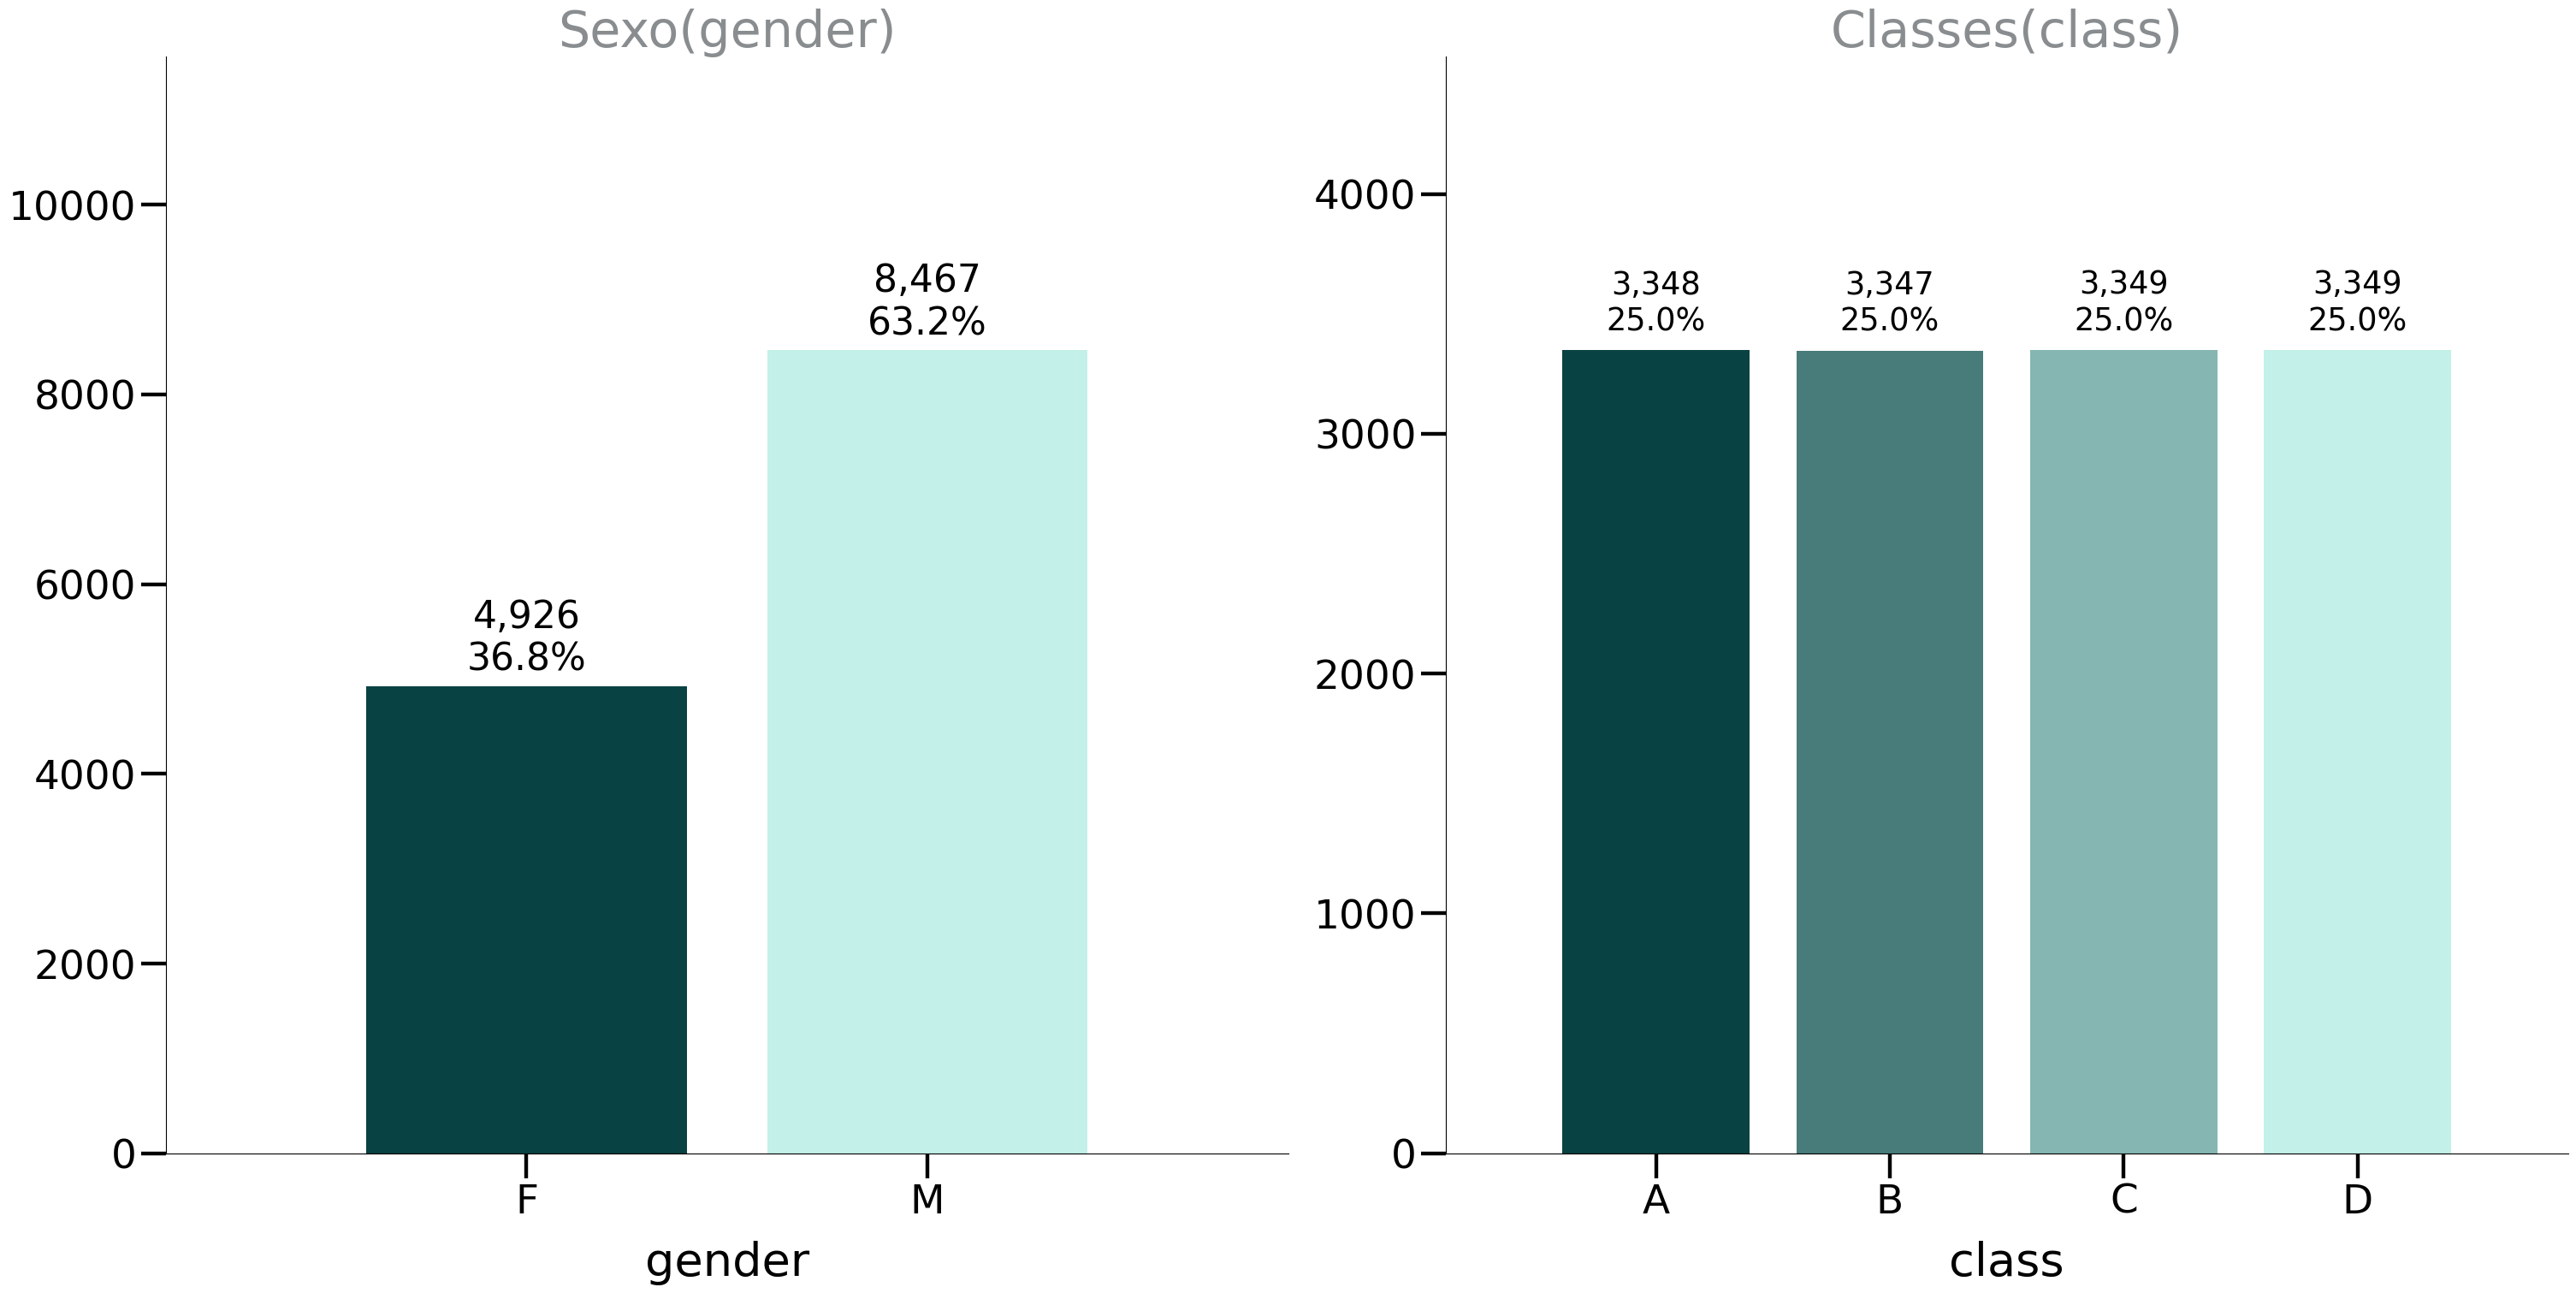

In [235]:
fig = plt.figure(constrained_layout=True, figsize=(30, 15))

gs = GridSpec(1,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# soma de todos os elementos nas classse
sumtot_gender=df_gender['count_gender'].sum()
sumtot_class=df_class['count_class'].sum()


# --- grafico 1
sns.barplot(ax=ax1, data=df_gender, x='gender', y='count_gender',
            palette=tmp.pmo_1(len(df_gender)))

# anotações e eixos
tmp.set_axes_2(ax1, "Sexo(gender)", 'gender', '')
an.porc_num_bar_verticais(ax1, f_texto_bar=0.025,f_tam_letra=0.03,
                            sum_tot=sumtot_gender, d_num=0)
li.muda_limites_eixo_y(ax1, frac=0.3)
li.muda_limites_eixo_x(ax1, frac=0.2, tipo_aumento=2)
# alterações do template
#ax1.spines[['left']].set_visible(False)
#ax1.set_yticks([])  


# --- grafico 2
sns.barplot(ax=ax2, data=df_class, x='class', y='count_class',
            palette=tmp.pmo_1(len(df_class)))

# anotações e eixos
tmp.set_axes_2(ax2, "Classes(class)", 'class', '')
an.porc_num_bar_verticais(ax2,f_texto_bar=0.025,f_tam_letra=0.025,
                          sum_tot=sumtot_class, d_num=0)
li.muda_limites_eixo_y(ax2, frac=0.3)
li.muda_limites_eixo_x(ax2, frac=0.1, tipo_aumento=2)
# alterações do template
#ax2.spines['left'].set_visible(False)
#ax2.set_yticks([])  

plt.show()

### 4.2 Variáveis numéricas <a id="distr_varnum"></a>

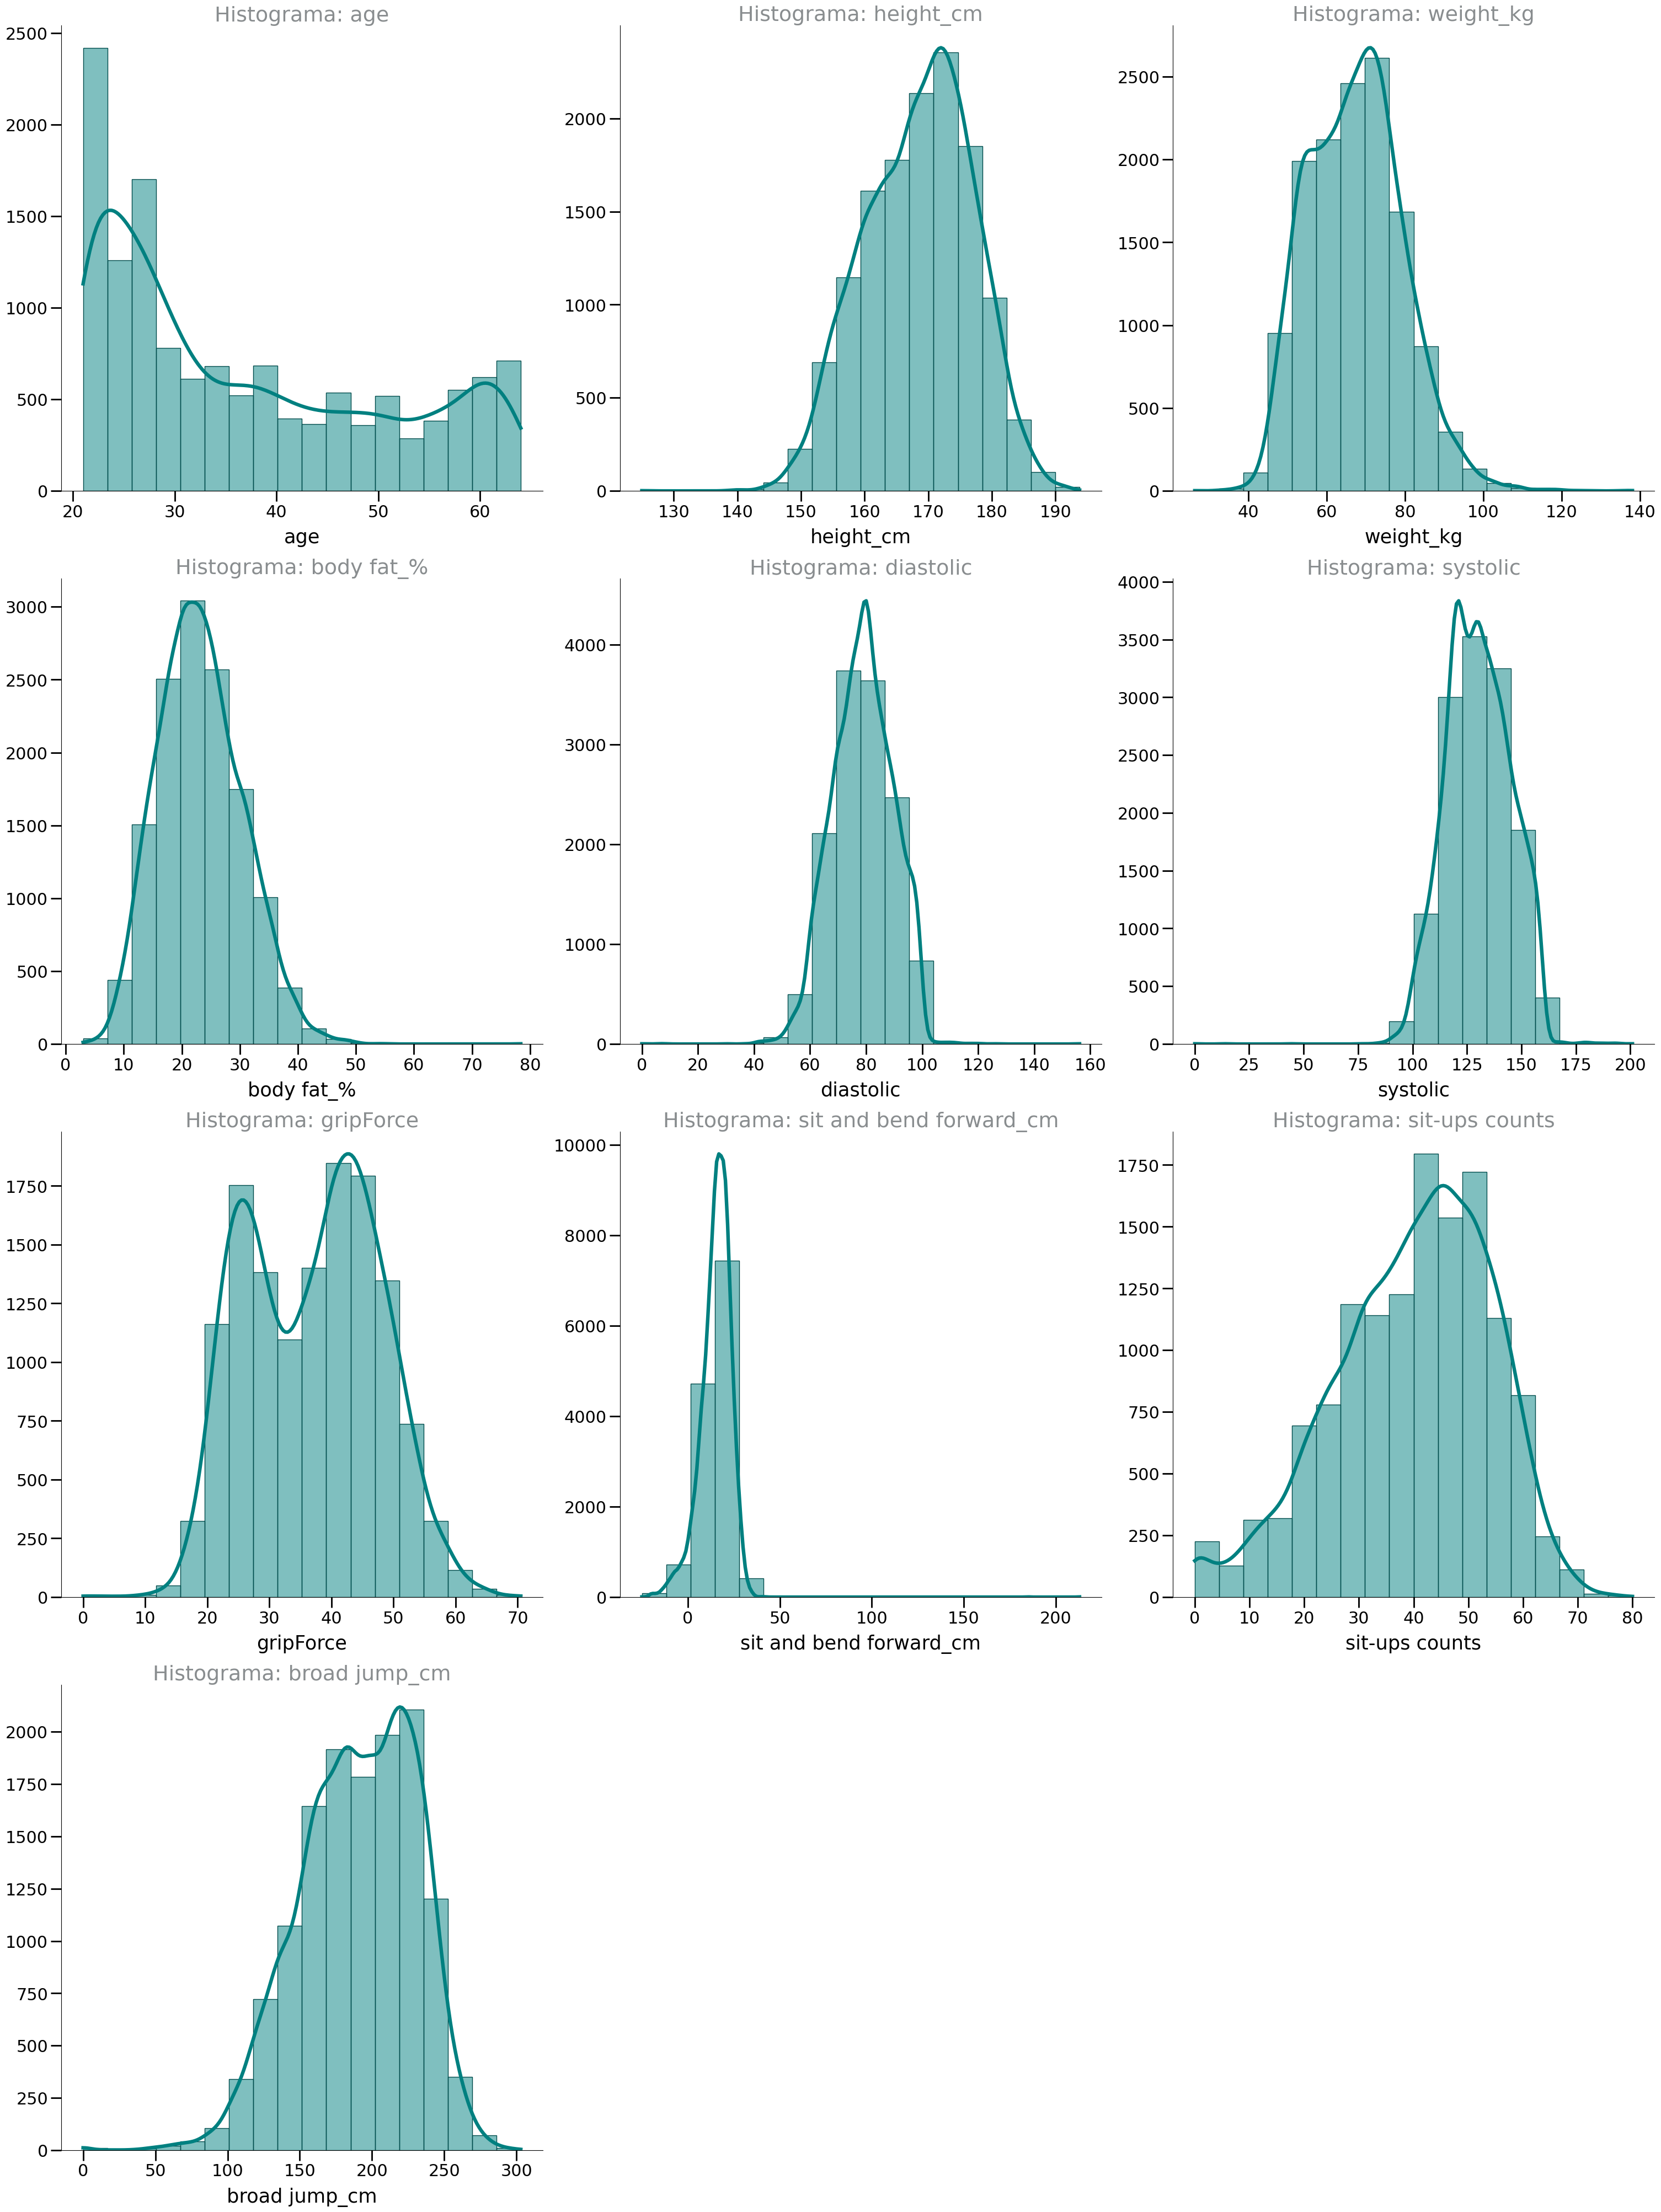

In [225]:
fig = plt.figure(constrained_layout=True, figsize=(30, 40))

gs = GridSpec(4,3, figure=fig)
 
for i in range(len(vars_num)):   
    
    # nome coluna
    x=vars_num[i]
    
    # define eixo e plota o histograma
    ax=fig.add_subplot(gs[int(i/3), i%3])
    sns.histplot(ax=ax,data=df, x=x,
                 bins=18, element= "bars",     
                 kde=True, line_kws={'linewidth':0.005*tmp._k(ax1)},
                 edgecolor=tmp.c1_forte,
                 color=tmp.c1_normal,
                )
    
    # define eixos e limites
    tmp.set_axes_2(ax,titulo="Histograma: "+x, ylabel=None, xlabel=x)
    li.muda_limites_eixo_y(ax1, frac=0.1)

    


# identificação de pontos outsides